In [2]:
#paquetes del programa
import csv
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 
#enlazar google cloud y activar el cliente
os.environ["GCLOUD_PROJECT"]="mdd-382503"
from google.cloud import bigquery
client = bigquery.Client()
                            

In [3]:
#primera funcion generacion dataset
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)
tabla_ref= dataset_ref.table('accident_2015')
tabla= client.get_table(tabla_ref)


In [31]:
#generacion de diccionario 
df = client.list_rows(tabla_ref, max_results=None).to_dataframe()
#selecciona solo los nombres
col_names = df.columns.tolist()
dic_names = {name: None for name in col_names}
pd.DataFrame(dic_names.items()).to_csv("dic_names.csv", header=False, index=False)


In [5]:
df

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,4,Arizona,40610,4,4,0,0,0,7,7,...,99,0,None,0,None,0,None,1,0,2015-09-20 14:55:00+00:00
32534,18,Indiana,180132,4,4,0,0,0,6,6,...,99,0,None,0,None,0,None,1,0,2015-03-10 22:30:00+00:00
32535,13,Georgia,130196,4,4,0,0,0,8,8,...,99,0,None,0,None,0,None,1,0,2015-03-02 06:17:00+00:00
32536,39,Ohio,390468,4,4,0,0,0,6,6,...,38,0,None,0,None,0,None,1,0,2015-07-13 07:54:00+00:00


In [6]:

# Obtener información del DataFrame original
columns = df.columns.tolist()
dtypes = df.dtypes.tolist()
example_data = df.iloc[0].tolist()

# Crear un nuevo DataFrame con la información obtenida
info_df = pd.DataFrame({'Columna': columns, 'Tipo de Dato': dtypes, 'Ejemplo de Dato': example_data})


In [7]:
info_df

,Columna,Tipo de Dato,Ejemplo de Dato
0,state_number,Int64,30
1,state_name,object,Montana
2,consecutive_number,Int64,300019
3,number_of_vehicle_forms_submitted_all,Int64,5
4,number_of_motor_vehicles_in_transport_mvit,Int64,5
...,...,...,...
65,related_factors_crash_level_3,Int64,0
66,related_factors_crash_level_3_name,object,None
67,number_of_fatalities,Int64,1
68,number_of_drunk_drivers,Int64,0


In [8]:
#generamos una consulta para Esta vs NumAcci 
query = """
select state_name,
  count(*) as number_of_fatalities,
from `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
group by state_name
ORDER BY number_of_fatalities DESC;
 """
query_job = client.query(query)
iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transformacion a data frame 
headlines = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# observamos el dataframe visualmente como tabla 
headlines.head(51)

,state_name,number_of_fatalities
0,Texas,3190
1,California,3123
2,Florida,2699
3,Georgia,1329
4,North Carolina,1275
5,Pennsylvania,1102
6,New York,1061
7,Ohio,1029
8,Illinois,914
9,South Carolina,911


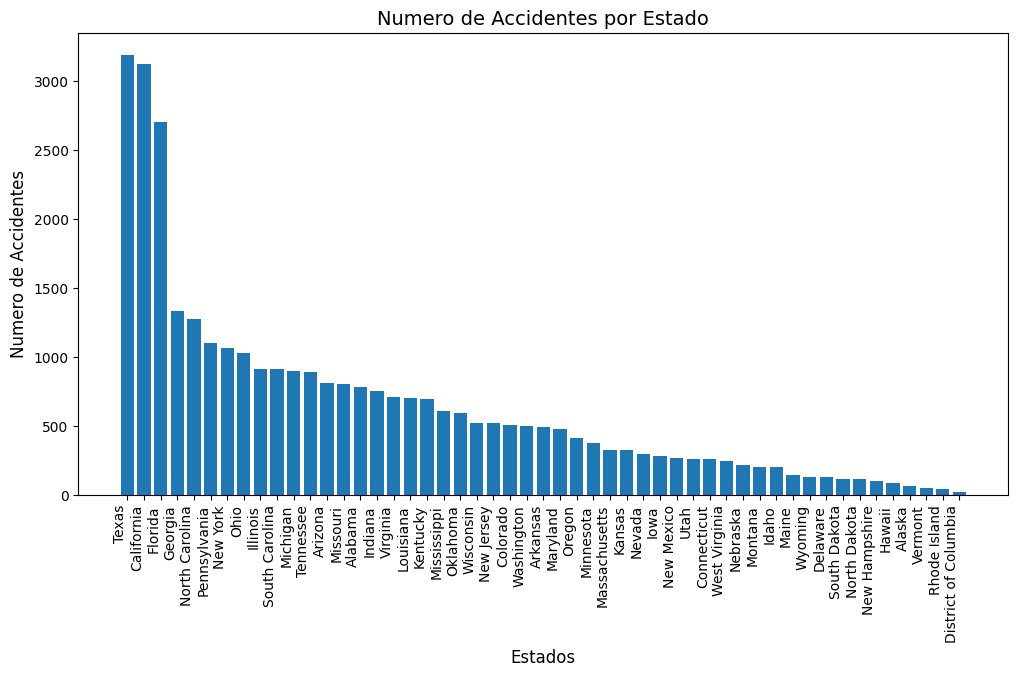

In [9]:
#Grafico Estado Vs Numero de Accidentes 
plt.figure(figsize=(12, 6))
plt.bar(headlines['state_name'], headlines['number_of_fatalities'])
plt.xlabel('Estados', fontsize=12)
plt.ylabel('Numero de Accidentes',fontsize=12)
plt.title('Numero de Accidentes por Estado',fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.yticks(fontsize=10)
plt.show()

In [10]:
#generamos una consulta para Uso vs Num Acci
query1 = """
select land_use_name,
  count(*) as number_of_fatalities,
from `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
group by land_use_name
 """
query1_job = client.query(query1)
iterator1 = query1_job.result(timeout=30)
rows1 = list(iterator1)

#transformacion a dataframe 
headlines1 = pd.DataFrame(data=[list(x.values()) for x in rows1], columns=list(rows1[0].keys()))

headlines1.head(10)

,land_use_name,number_of_fatalities
0,Rural,15860
1,Urban,16494
2,Trafficway Not in State Inventory,150
3,Unknown,24
4,Not Reported,10


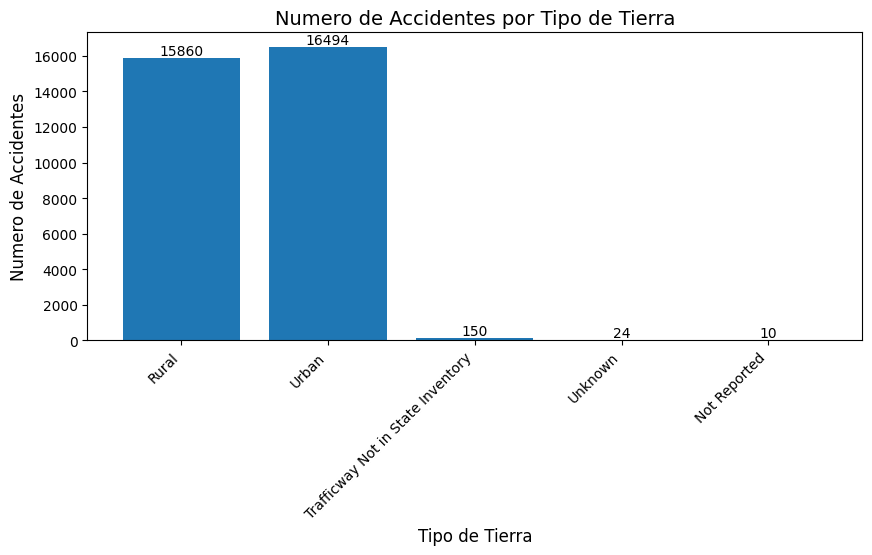

In [11]:
#Grafico Tipo Vs Numero de Accidentes 
plt.figure(figsize=(10, 4))
plt.bar(headlines1['land_use_name'], headlines1['number_of_fatalities'])
plt.xlabel('Tipo de Tierra', fontsize=12)
plt.ylabel('Numero de Accidentes',fontsize=12)
plt.title('Numero de Accidentes por Tipo de Tierra',fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.yticks(fontsize=10)
for i, v in enumerate(headlines1['number_of_fatalities']):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

In [12]:
#generamos una consulta para Empresa vs Num Acci
query2 = """
select ownership_name,
  count(*) as number_of_fatalities,
from `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
group by ownership_name
 """
query2_job = client.query(query2)
iterator2 = query2_job.result(timeout=30)
rows2 = list(iterator2)

#transformamos los datos  aun dataframe 
headlines2 = pd.DataFrame(data=[list(x.values()) for x in rows2], columns=list(rows2[0].keys()))

headlines2.head(22)

,ownership_name,number_of_fatalities
0,State Highway Agency,16107
1,State Toll Road,80
2,Not Reported,6388
3,City or Municipal Highway Agency,3390
4,Other Local Agency,738
5,Unknown,1139
6,Trafficway Not in State Inventory,150
7,County Highway Agency,3295
8,Bureau of Land Management,4
9,Town or Township Highway Agency,1046


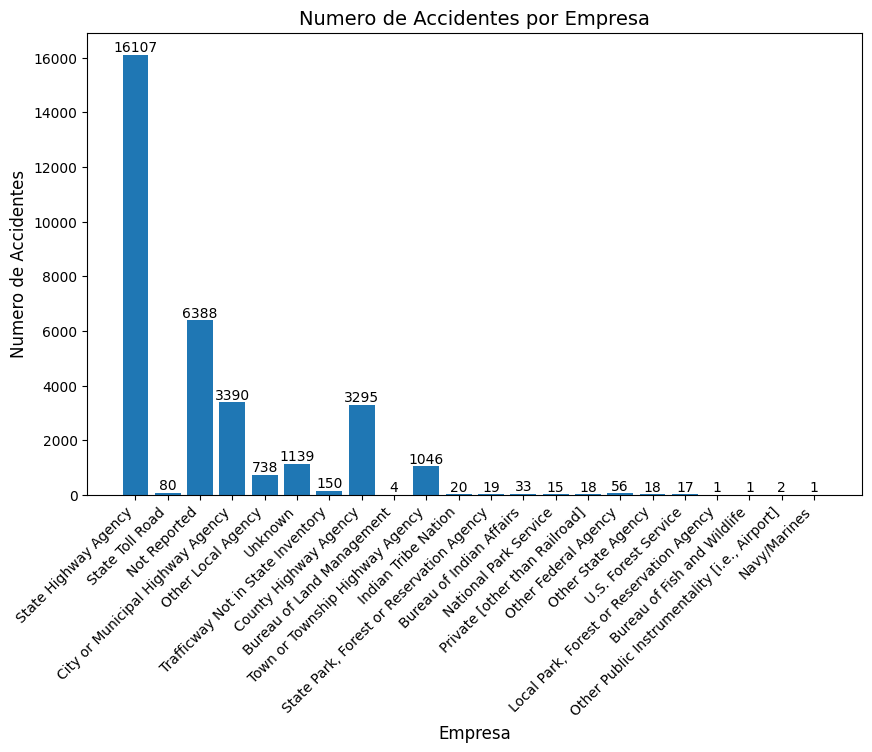

In [13]:
#Grafico Empresa Vs Numero de Accidentes 
plt.figure(figsize=(10, 6))
plt.bar(headlines2['ownership_name'], headlines2['number_of_fatalities'])
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Numero de Accidentes',fontsize=12)
plt.title('Numero de Accidentes por Empresa',fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.yticks(fontsize=10)
for e, b in enumerate(headlines2['number_of_fatalities']):
    plt.text(e, b, str(b), ha='center', va='bottom', fontsize=10)
plt.show()

In [14]:
#generamos una consulta para Carretera vs Num Acci
query3 = """
SELECT trafficway_identifier, 
COUNT(*) as number_of_fatalities
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY trafficway_identifier
HAVING COUNT(*) != 1
ORDER BY number_of_fatalities DESC;

 """
query3_job = client.query(query3)
iterator3 = query3_job.result(timeout=30)
rows3 = list(iterator3)

#transformamos los datos  aun dataframe 
headlines3 = pd.DataFrame(data=[list(x.values()) for x in rows3], columns=list(rows3[0].keys()))
#se dejara hasta el cifra 16 ya que muchos datos se parecen y tome la desicion de dejar los mas importantes sobre
#80 accidentes 
headlines3.head(17)

,trafficway_identifier,number_of_fatalities
0,I-10,274
1,I-95,213
2,I-75,204
3,US-1,190
4,I-40,159
5,I-5,149
6,I-20,141
7,I-70,131
8,I-80,130
9,US-17,114


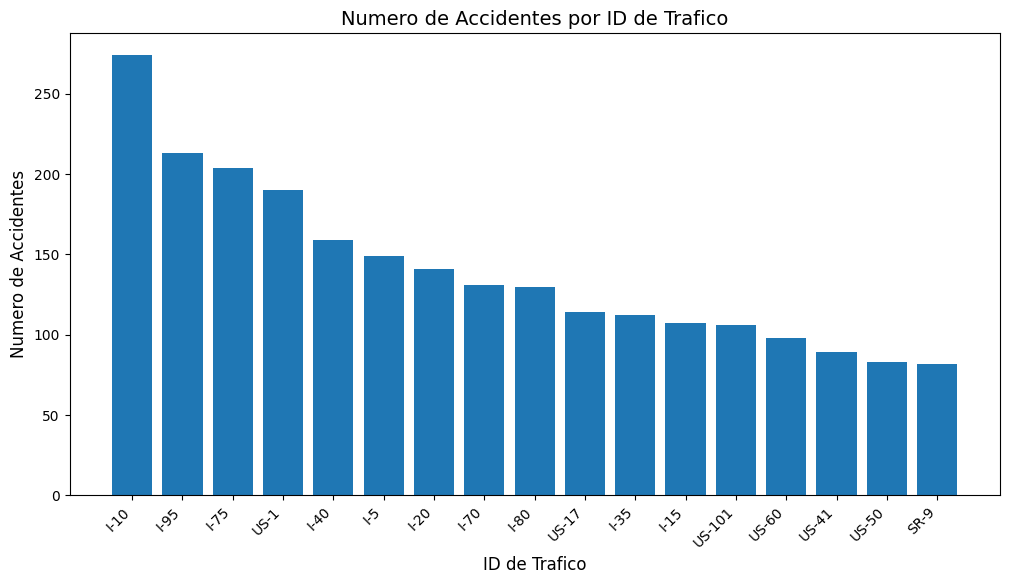

In [15]:
#Grafico ID Trafico Vs Numero de Accidentes 
plt.figure(figsize=(12, 6))
plt.bar(headlines3['trafficway_identifier'][:17], headlines3['number_of_fatalities'][:17])
plt.xlabel('ID de Trafico', fontsize=12)
plt.ylabel('Numero de Accidentes',fontsize=12)
plt.title('Numero de Accidentes por ID de Trafico',fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.yticks(fontsize=10)
plt.show()

In [16]:
#df_count crea un nuevo data frame que cuenta los accidentes por estado totales, a partir de df y la cuenta es occurence
df_count = df['state_name'].value_counts().reset_index().rename(columns={"index": "state_name", "state_name": "Occurence"})
#interme a partir del anterior hace otro dataframe que contiene los 15 mas altos
df_interme = df_count.nlargest(16, 'count') 
#d_uni con .isin toma de df los accidentes que solo coinciden con los estados que estan con h15
df_uni = df[df.state_name.isin(df_interme.Occurence)]
#count_month toma el datafre que creo y los agrupa por estado y mes de accidente con comando gruopby
df_count_month = df_uni.groupby(['state_name', 'month_of_crash']).size().reset_index(name='Occurence')

month = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Augosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
df_count_month['month_of_crash'] = df_count_month['month_of_crash'].map(month)
df_count_month

,state_name,month_of_crash,Occurence
0,Alabama,Enero,50
1,Alabama,Febrero,37
2,Alabama,Marzo,59
3,Alabama,Abril,69
4,Alabama,Mayo,72
...,...,...,...
187,Texas,Augosto,239
188,Texas,Septiembre,256
189,Texas,Octubre,319
190,Texas,Noviembre,265


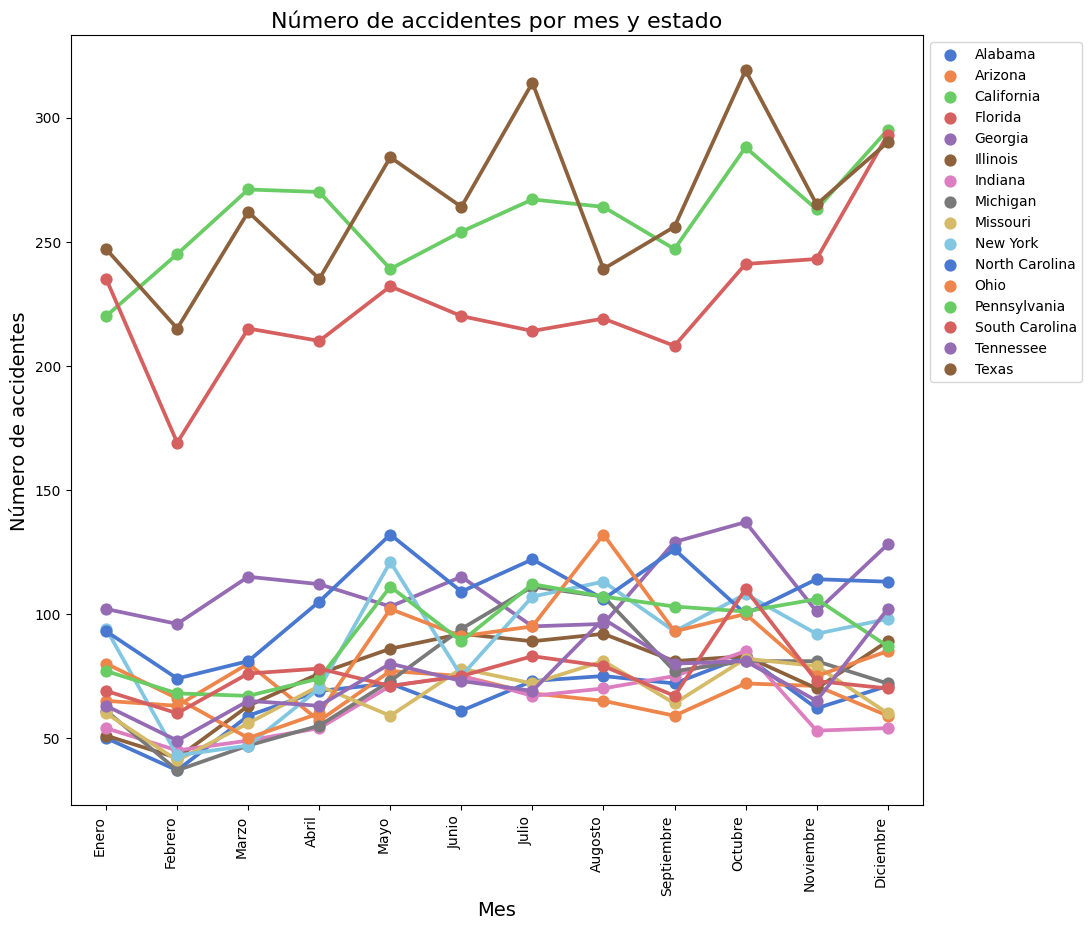

In [17]:
#ploteo del grafico 
plt.figure(figsize=(11,10))
plt.title('Número de accidentes por mes y estado', fontsize=16)
sns.pointplot(x='month_of_crash', y='Occurence', hue='state_name', data=df_count_month, palette='muted')
plt.xlabel('Mes',fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.ylabel('Número de accidentes', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc=0)

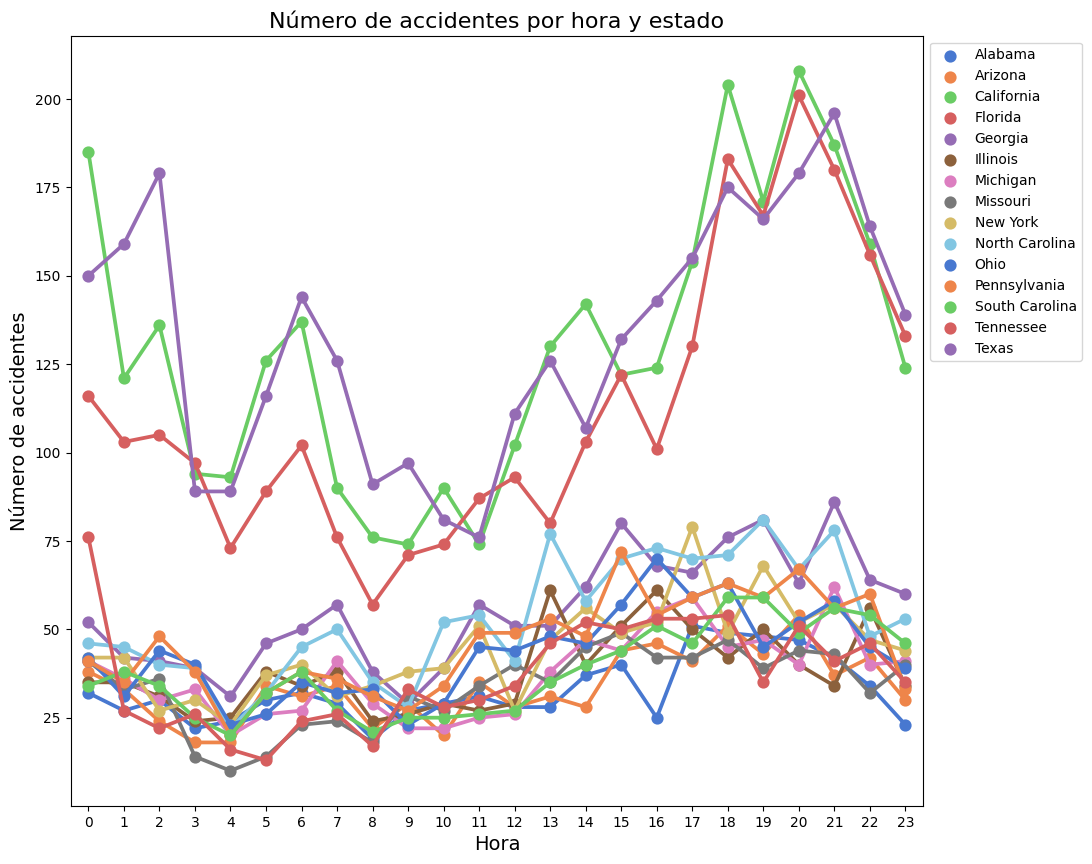

In [18]:
#query para la pregunta 4 buscamos las hora 
query4 = """
select state_name,number_of_fatalities,timestamp_of_crash, 
from `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
 """

query4_job = client.query(query4)
iterator4 = query4_job.result(timeout=30)
rows4 = list(iterator4)

headlines4 = pd.DataFrame(data=[list(x.values()) for x in rows4], columns=list(rows4[0].keys()))

headlines4['hour_of_crash'] = pd.to_datetime(headlines4['timestamp_of_crash']).dt.floor('H').dt.strftime('%Y-%m-%d %H:%M:%S').str.split(' ').str[1].str.split(':').str[0].astype(int)

states_orde = headlines['state_name'][:15]

#Filtrar el dataframe por los estados seleccionados
filtered_headlines4 = headlines4[headlines4['state_name'].isin(states_orde)]

# Agrupar por hora de accidente, nombre del estado y contar el número de accidentes
grouped_data = filtered_headlines4.groupby(['hour_of_crash', 'state_name']).count().reset_index()

#plot
plt.figure(figsize=(11, 10))
plt.title('Número de accidentes por hora y estado', fontsize=16)
sns.pointplot(x='hour_of_crash', y='number_of_fatalities', hue='state_name', data=grouped_data, palette='muted')
plt.xlabel('Hora', fontsize=14)
plt.ylabel('Número de accidentes', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc=0)
plt.show()

In [19]:
#Consulta para obtener los Estados, Numero de Accidentes, Dato de los conductores ebrios
query5 = """SELECT state_name, number_of_drunk_drivers, number_of_fatalities,
       FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
"""
query5_job = client.query(query5)
iterator5 = query5_job.result(timeout=30)
rows5 = list(iterator5)
headlines5 = pd.DataFrame(data=[list(x.values()) for x in rows5], columns=list(rows5[0].keys()))
headlines5.head(10)


,state_name,number_of_drunk_drivers,number_of_fatalities
0,Montana,0,1
1,Ohio,0,1
2,Utah,0,1
3,Texas,0,1
4,Oregon,0,1
5,Ohio,0,1
6,Ohio,0,1
7,Pennsylvania,0,2
8,Ohio,0,1
9,New Jersey,0,1


In [20]:
#contamos los accidentes totales
df_count_total = df['state_name'].value_counts().reset_index().rename(columns={"index": "state_name", "count": "total_accident"})
#entrelazamos la info de df con count_total para poder contar posterior mente drunk_drivers
df_inter = df[df.state_name.isin(df_count_total.state_name)].rename(columns={"count":"total_accident"})
#despues de enlazar los datos contado de df-count_total contamos drunk_drivers
df_drunk_drivers = df_inter.groupby('state_name')['number_of_drunk_drivers'].sum().reset_index().rename(columns={"number_of_drunk_drivers": "total_drunk_drivers"})
#combinar el recuento de accidentes y el recuento de conductores ebrios por estado
df_count_total = pd.merge(df_count_total, df_drunk_drivers, on='state_name')
df_count_cut = df_count_total.nlargest(16, 'total_accident')
df_count_cut.head(16)

,state_name,total_accident,total_drunk_drivers
0,Texas,3190,871
1,California,3123,1005
2,Florida,2699,644
3,Georgia,1329,304
4,North Carolina,1275,399
5,Pennsylvania,1102,336
6,New York,1061,224
7,Ohio,1029,332
8,Illinois,914,303
9,South Carolina,911,303


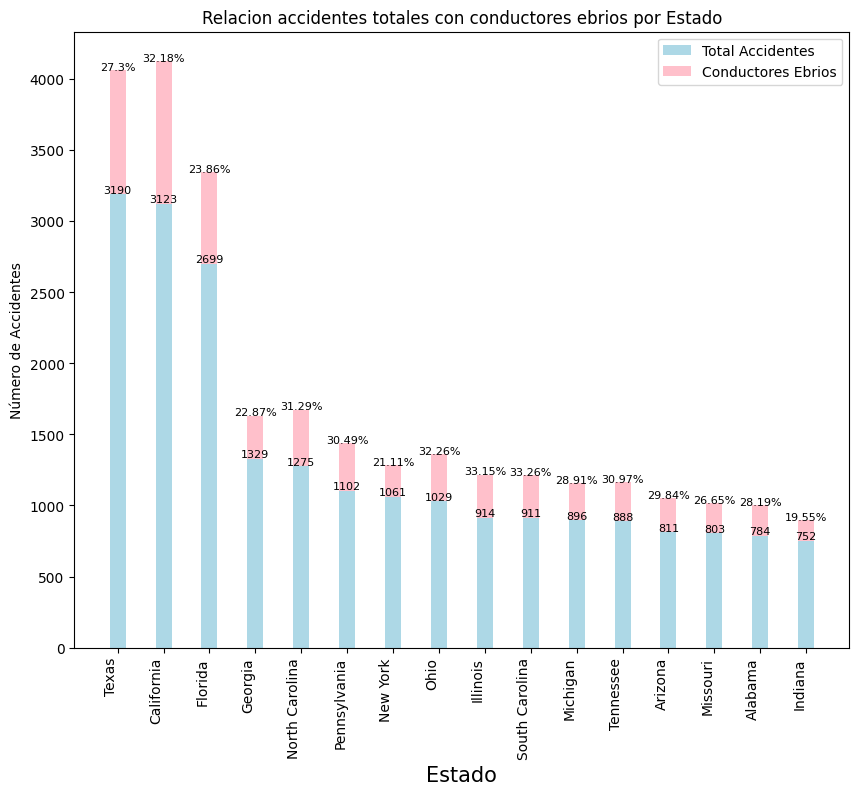

In [21]:
#ploteo
fig, ax = plt.subplots(figsize=(10,8))
bar_width = 0.35

# primer barras
ax.bar(df_count_cut['state_name'], df_count_cut['total_accident'], width=bar_width, color='#ADD8E6', label='Total Accidentes')

# segundo barras
ax.bar(df_count_cut['state_name'], df_count_cut['total_drunk_drivers'], width=bar_width, color='#FFC0CB', label='Conductores Ebrios', bottom=df_count_cut['total_accident'])
#creamos un listado para generar los porcentajes
L=[]
for e, r in zip(df_count_cut['total_accident'] ,df_count_cut['total_drunk_drivers']):
       x=r/e
       L.append(x)
for i in range(len(df_count_cut)):
    ax.text(i, df_count_cut['total_drunk_drivers'][i] + df_count_cut['total_accident'][i], f"{round(L[i]*100, 2)}%", ha='center', fontsize=8, color='black')
    ax.text(i, df_count_cut['total_accident'][i] + 10, df_count_cut['total_accident'][i], ha='center', fontsize=8)

ax.set_xlabel('Estado', fontsize= 15)
plt.xticks(rotation=90, ha='right', fontsize=10)
ax.set_ylabel('Número de Accidentes')
ax.set_title('Relacion accidentes totales con conductores ebrios por Estado')
ax.legend()
plt.show()
